# Zadaća 2
##### Rok za predaju: 10. ožujka, 2021. u 23:59h
##### Način predaje: Teams->Strojno učenje->Assignment, predajete.ipynb datoteka (ili više datoteki u .zip) ili link na Google colab 

### Ime i prezime: 

In [19]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import make_blobs, make_circles
from sklearn import preprocessing

## Zadatak 1 (5)
Zadan vam je model perceptrona sa parametrima $\theta =[\theta_1 ,\theta_2]= [2.5, 3]$. <br>
Skicirajte (nacrtajte) klasifikacijsku hiperravninu (pravac) definiranu ovim parametrima. Klasificira li ispravno ovaj model sljedeće podatke
$$X= [(0,-0.8), (-1,0), (-0.5, -0.5), (0,1), (0.5,0.8)]$$
sa pripadnim oznakama klasa 
$$y = [-1,-1,-1,-1,1]. $$


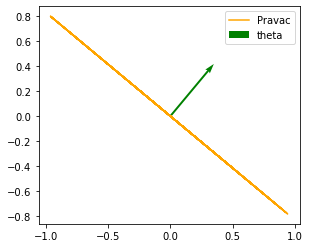

In [25]:
theta1 = 2.5
theta2 = 3
theta = np.array([theta1, theta2])

xx = np.random.uniform(-1,1,(50,1))
yy = -xx*(theta1/theta2)
plt.plot(xx,yy, color='orange', label='Pravac')
plt.quiver(*[0,0], *theta, color=['green'], scale=15, label='theta')
plt.legend()
plt.gca().set_aspect('equal')  
plt.show()

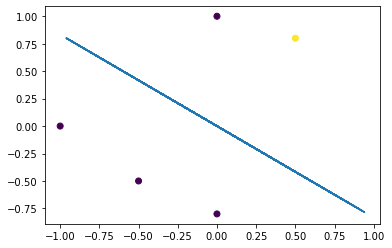

In [37]:
X = np.array([[0,-0.8],[-1,0],[-0.5,-0.5],[0,1],[0.5,0.8]])
y = [-1,-1,-1,-1,1]
plt.scatter(X[:,0],X[:,1], c=y)
plt.plot(xx,yy)
plt.show()

## Zadatak 2 (10)
Kao što smo na vježbama radili, pomoću perceptrona implementirajte logičke XNOR, NAND. 

___

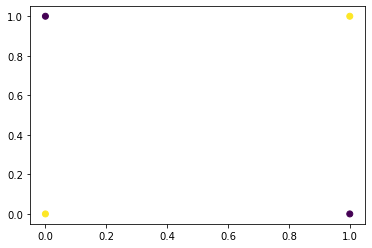

In [41]:
#XNOR
X = np.array([[0,0],[0,1],[1,0], [1,1]])
y = np.array([1,-1,-1,1])
plt.scatter(X[:,0], X[:,1], c=y)
plt.show()

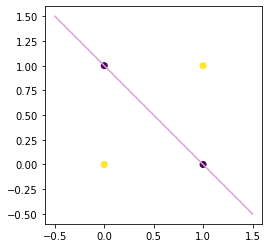

In [42]:
theta = np.array([1,1,1])
plt.plot(np.arange(-0.5,2), (-theta[1]/theta[2]*np.arange(-0.5,2) + theta[0]), color='plum')
plt.scatter(X[:,0], X[:,1], c=y)
plt.gca().set_aspect('equal')  
plt.show()

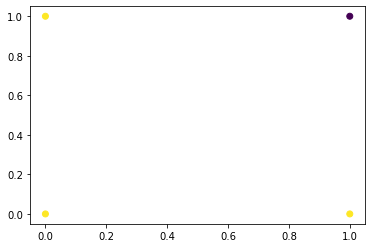

In [43]:
#NAND
X = np.array([[0,0],[0,1],[1,0], [1,1]])
y = np.array([1,1,1,-1])
plt.scatter(X[:,0], X[:,1], c=y)
plt.show()

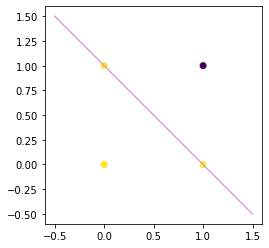

In [44]:
theta = np.array([1,1,1])
plt.plot(np.arange(-0.5,2), (-theta[1]/theta[2]*np.arange(-0.5,2) + theta[0]), color='plum')
plt.scatter(X[:,0], X[:,1], c=y)
plt.gca().set_aspect('equal')  
plt.show()

## Zadatak 3 (15+10)
---
Vaš zadatak će biti implementirati perceptron koji će rješavati problem klasifikacije podataka s obzirom na jednu od dvije klase $\{ 1, -1\}$.

Na predavanju je pokazan perceptron algoritam za podatke koji su linearno separabilni kroz ishodište. Drugim riječima, definirali smo da su podaci $\{ (x^{(i)}, y^{(i)}) : i=1,\cdots,m\}$ linearno separabilni kroz ishodište ako postoji $\theta = [\theta_1, \cdots, \theta_n]$ takav da je $y^{(i)} \theta ^T x^{(i)} > 0$, $\forall i = 1,\cdots, m$. 

U zadaći želimo ovaj koncept generalizirati tako da separabilnost ne bude nužno kroz ishodište. <br>
Tada možemo reći da će podaci  $\{ (x^{(i)}, y^{(i)}) : i=1,\cdots,m\}$ biti linearno separabilni ako postoji $\theta = [\theta_0, \theta_1, \cdots, \theta_n]$ takav da je $y^{(i)} \theta ^T x^{(i)} > 0$, $\forall i = 1,\cdots, m$, pri čemu je svaki podatak oblika $x^{(i)} = [1, x_1^{(i)}, \cdots, x_n^{(i)}]$.


1. Implementirajte algoritam perceptrona koji na ulazu ima  argumente: $X \in \mathbb{R}^{(m\times (n+1))} $ i $y \in \mathbb{R}^{(m\times 1)} $, gdje je $m$ ukupan broj ulaznih podataka, a $n$ broj varijabli ulaznog podatka. <br> Algoritam treba vratiti vektor parametera $\theta \in \mathbb{R}^{(n+1)\times 1}$ i broj $k$ koji predstavlja koliko je puta ažurirana vrijednost $\theta$. Kao što je pokazano na predavanju, algoritam treba ciklički prolaziti kroz podatke i prilagođavati parametre. 

2. Učitajte podatke koji su vam dani X_a.csv i y_a.csv te na njima pokrenite algoritam iz prethodnog zadatke. Ispište dobivenu vrijednost parametara $\theta$ i broj ažuriranja $k$. To ponovite na podacima X_b.csv i y_b.csv

_Dalje ćemo u zadacima govoriti paralelno za oba skupa podataka i uvesti oznake s indeksima $a$ tj. $b$ koje će se odnositi na podatke iz  X_a.csv tj. X_b.csv_


3. Izračunajte vrijednosti $\gamma_{geom}^a$ i  $\gamma_{geom}^b$ vašeg klasifikatora, tj. najmanju udaljenost podatka do hiperravnine određene formulom $\theta_a ^{T} x = 0$ odnosno hiperravnine $\theta_b ^{T} x = 0$ za podatke iz drugog skupa. 
4.  Vizualizirajte podatke $X_a$ i dobiveni dobiveni pravac $\theta_a x = 0$ te analogno podatke $X_b$ i pravac $\theta_b x = 0$. Na oba grafička prikaza treba biti naznačeno pripadanje podataka jednoj od dvije klase. 
5. Na temelju zadatka 3. i 4. interpretirajte koji je od ova dva problema teži za klasificirati. 
6. U analizi ovog algoritma, napravljena je pretpotstavka o tome kako su norme svih podataka ograničene s nekim brojem $R$. Izračunajte te brojeve $R$ za vaše skupove podataka. 

In [76]:
def PerceptronMethod(X,y):
    m = X.shape[0]
    n = X.shape[1]
    theta = np.zeros((n,1))
    k=0
    counter = 0
    fst = True
    prev = np.zeros((n,1))
    while counter < m:
        counter = 0
        for i in range(m):
            y_pred = np.sign(theta.T.dot(X[i]))
            if fst or y_pred*y[i]<0:
                k+=1
                prev = theta
                theta += y[i]*X[i].reshape(-1,1)
                print('gama:',theta.T.dot(X[i]), y[i])
            else:
                counter+=1
            fst = False
    return theta, k

X_a = pd.read_csv('X_a.csv')
y_a = pd.read_csv('y_a.csv')
X_a = X_a.to_numpy()
y_a = y_a.to_numpy()
X_a = np.concatenate((np.ones((X_a.shape[0],1)),X_a),axis=1) #dodamo u X prvi stupac jedinica

theta, k = PerceptronMethod(X_a,y_a)
print("theta:",theta)
print("k:",k)

X_b = pd.read_csv('X_b.csv')
y_b = pd.read_csv('y_b.csv')
X_b = X_b.to_numpy()
y_b = y_b.to_numpy()
X_b = np.concatenate((np.ones((X_b.shape[0],1)),X_b),axis=1) #dodamo u X prvi stupac jedinica

theta, k = PerceptronMethod(X_b,y_b)
print("theta:",theta)
print("k:",k)

gama: [331.821664] [1.]
gama: [-302.01848944] [-1.]
gama: [1084.79312568] [1.]
gama: [-263.05512239] [-1.]
gama: [-356.81996727] [-1.]
gama: [911.14541128] [1.]
gama: [-1342.38770135] [-1.]
gama: [889.33831555] [1.]
gama: [-252.76129219] [-1.]
gama: [-694.64432394] [-1.]
gama: [223.88212969] [1.]
gama: [1039.81042279] [1.]
gama: [-234.14518541] [-1.]
gama: [-604.13593506] [-1.]
gama: [596.82761584] [1.]
gama: [-475.59514423] [-1.]
gama: [934.40435847] [1.]
gama: [-373.07628704] [-1.]
theta: [[ -2.        ]
 [-63.88662382]
 [ 63.64508767]]
k: 18
gama: [327.06805884] [1.]
gama: [-731.93984946] [-1.]
gama: [1092.51287167] [1.]
gama: [-776.90914524] [-1.]
gama: [595.29332099] [1.]
gama: [-572.55409637] [-1.]
gama: [493.41107599] [1.]
theta: [[  1.        ]
 [-42.57597783]
 [ 48.3655507 ]]
k: 7


## Zadatak 4 (10)
U datotekama i su vam zadani podaci koje koje je potrebno klasificirati perceptron algoritmom. 
1. Učitajte podatke 2X_a, 2y_a vizualizirajte ih. 
2. Odredite kojom biste klasom funkcija mogli separirati ove podatke. Parametre funkcije iz te klase trebate pronaći koristeći perceptron algoritam koji ste implementirali. 
___

In [ ]:
# Vaš kod

## Zadatak 5 (10):
Nadogradite implementaciju perceptron algoritma tako da u svakoj iteraciji vizualizirate podatke i dobiveni pravac koji separira te podatke. <br>
Pokrenite algoritam na podacima koje ćete dobiti koristeći ugrađenu funkciju iz scikit-learn *make_blobs* sa sljedećim parametrima: <br>make_blobs(n_samples=500, n_features=2, centers=2, random_state=4).

Opišite dobiveni rezultat. 

In [ ]:
# Vaš kod